# Домашнее задание 1

# Автор: Алина Ермилова

В этой домашней работе Вы сможете попрактиваться в применении фреймворка для подбора гиперпараметров [Optuna](https://optuna.org/) для одной из наиболее популярных вариаций градиентного бустинга [XGBoost](https://xgboost.readthedocs.io/en/stable/python/index.html).

Это домашнее задание состоит из **4х заданий**, **максимальная** сумма за выполнение которых составляет **25 баллов**. Однако, **3 лучших решения** получат дополнительно **+5 бонусных баллов**.

In [ ]:
# установка необходимых библиотек

!pip install optuna optuna-dashboard xgboost

# Задание 1. [5 баллов]

Возьмите выборку на Ваше усмотрение и сделайте ее быстрый анализ, постройте первый вариант модели.

Примеры анализа и построения модели:
* [Предсказание стоимости автомобилей](https://www.kaggle.com/code/niteshyadav3103/car-price-eda-and-modelling). Пример jupyter-ноутбука с детальным анализом данных, разбиением выборки на обучающую и тестовую и построением нескольких классических моделей.
* [Апельсины и грейпфруты](https://www.kaggle.com/code/mahmoudmagdy07/oranges-vs-grapefruit-team-20). Пример jupyter-ноутбука с детальным анализом данных, разбиением выборки на обучающую и тестовую и использованием "Наивного Байеса" и нейросетей.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

import warnings
warnings.filterwarnings('ignore')

In [3]:
print(load_diabetes(as_frame=True)['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
diabetes = load_diabetes(as_frame=True)['frame']
print(diabetes.describe())
print(diabetes.shape)
print(diabetes.isna().sum())
diabetes.sample(10)

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
124,-0.005515,-0.044642,0.023973,0.008101,-0.034592,-0.038892,0.022869,-0.039493,-0.015999,-0.013504,121.0
405,0.048974,0.050680,0.123131,0.083844,-0.104765,-0.100895,-0.069172,-0.002592,0.036644,-0.030072,281.0
203,-0.001882,0.050680,0.030440,0.052858,0.039710,0.056619,-0.039719,0.071210,0.025395,0.027917,222.0
133,-0.041840,0.050680,-0.053630,-0.040099,-0.084126,-0.071772,-0.002903,-0.039493,-0.072133,-0.030072,83.0
331,0.081666,0.050680,-0.025607,-0.036656,-0.070367,-0.046407,-0.039719,-0.002592,-0.041176,-0.005220,199.0
166,-0.056370,0.050680,-0.060097,-0.036656,-0.088254,-0.070833,-0.013948,-0.039493,-0.078140,-0.104630,70.0
186,-0.081798,0.050680,0.042296,-0.019442,0.039710,0.057558,-0.069172,0.108111,0.047190,-0.038357,137.0
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775,122.0
356,-0.005515,0.050680,-0.033151,-0.015999,0.008063,0.016222,0.015505,-0.002592,-0.028323,-0.075636,54.0
397,0.052606,-0.044642,-0.004050,-0.030907,-0.046975,-0.058307,-0.013948,-0.025840,0.036060,0.023775,198.0


In [11]:
!pip install numpy>=1.23.0
!pip install dython


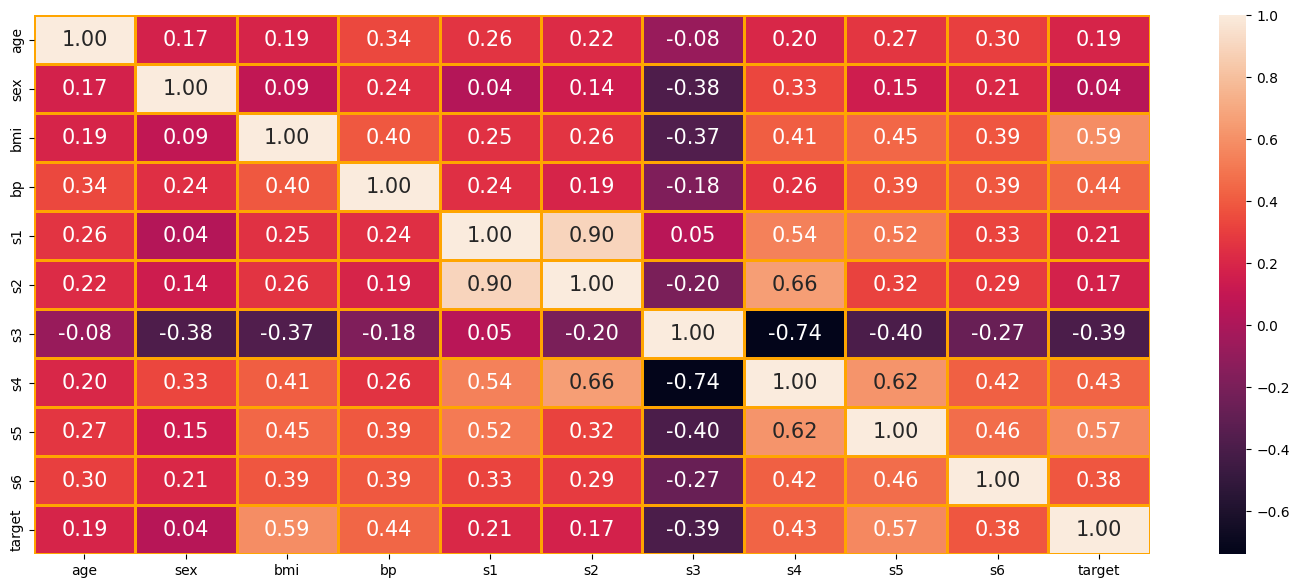

In [12]:
# heatmap of the data for checking the correlation between the numerical features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(diabetes.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

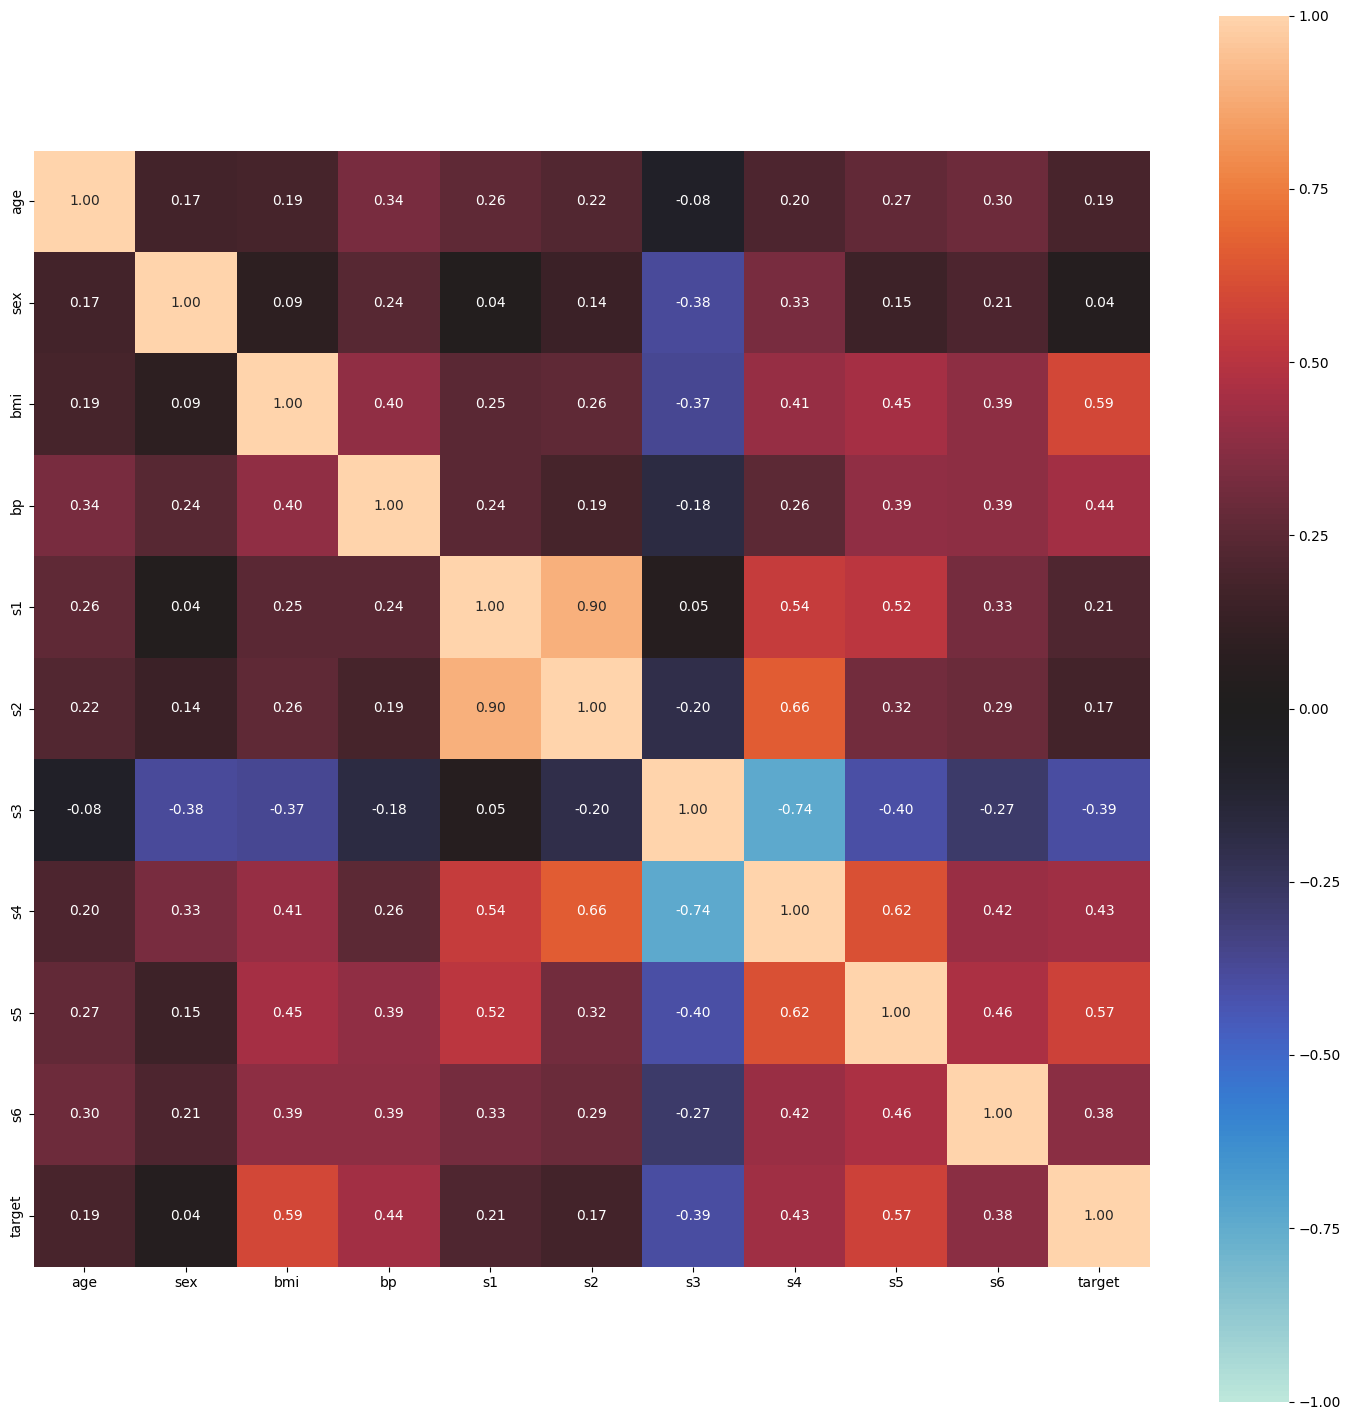

In [13]:
# finding correlation of numerical and categorical features

from dython.nominal import associations

associations(diabetes, figsize = (18, 18))
plt.show()

**Выводы по анализу кореляционной зависимости**

1. Наибольшая корреляция с таргетом наблюдается у bmi (59%), bp (44%), s4 (43%), s5 (57%)
2. Самая сильная отрицательная корреляция между s4 и s3 (-74%)
3. Самая сильная положительная взаимосвязь между s1 и s2 (90%), возможна мультиколлинеарность

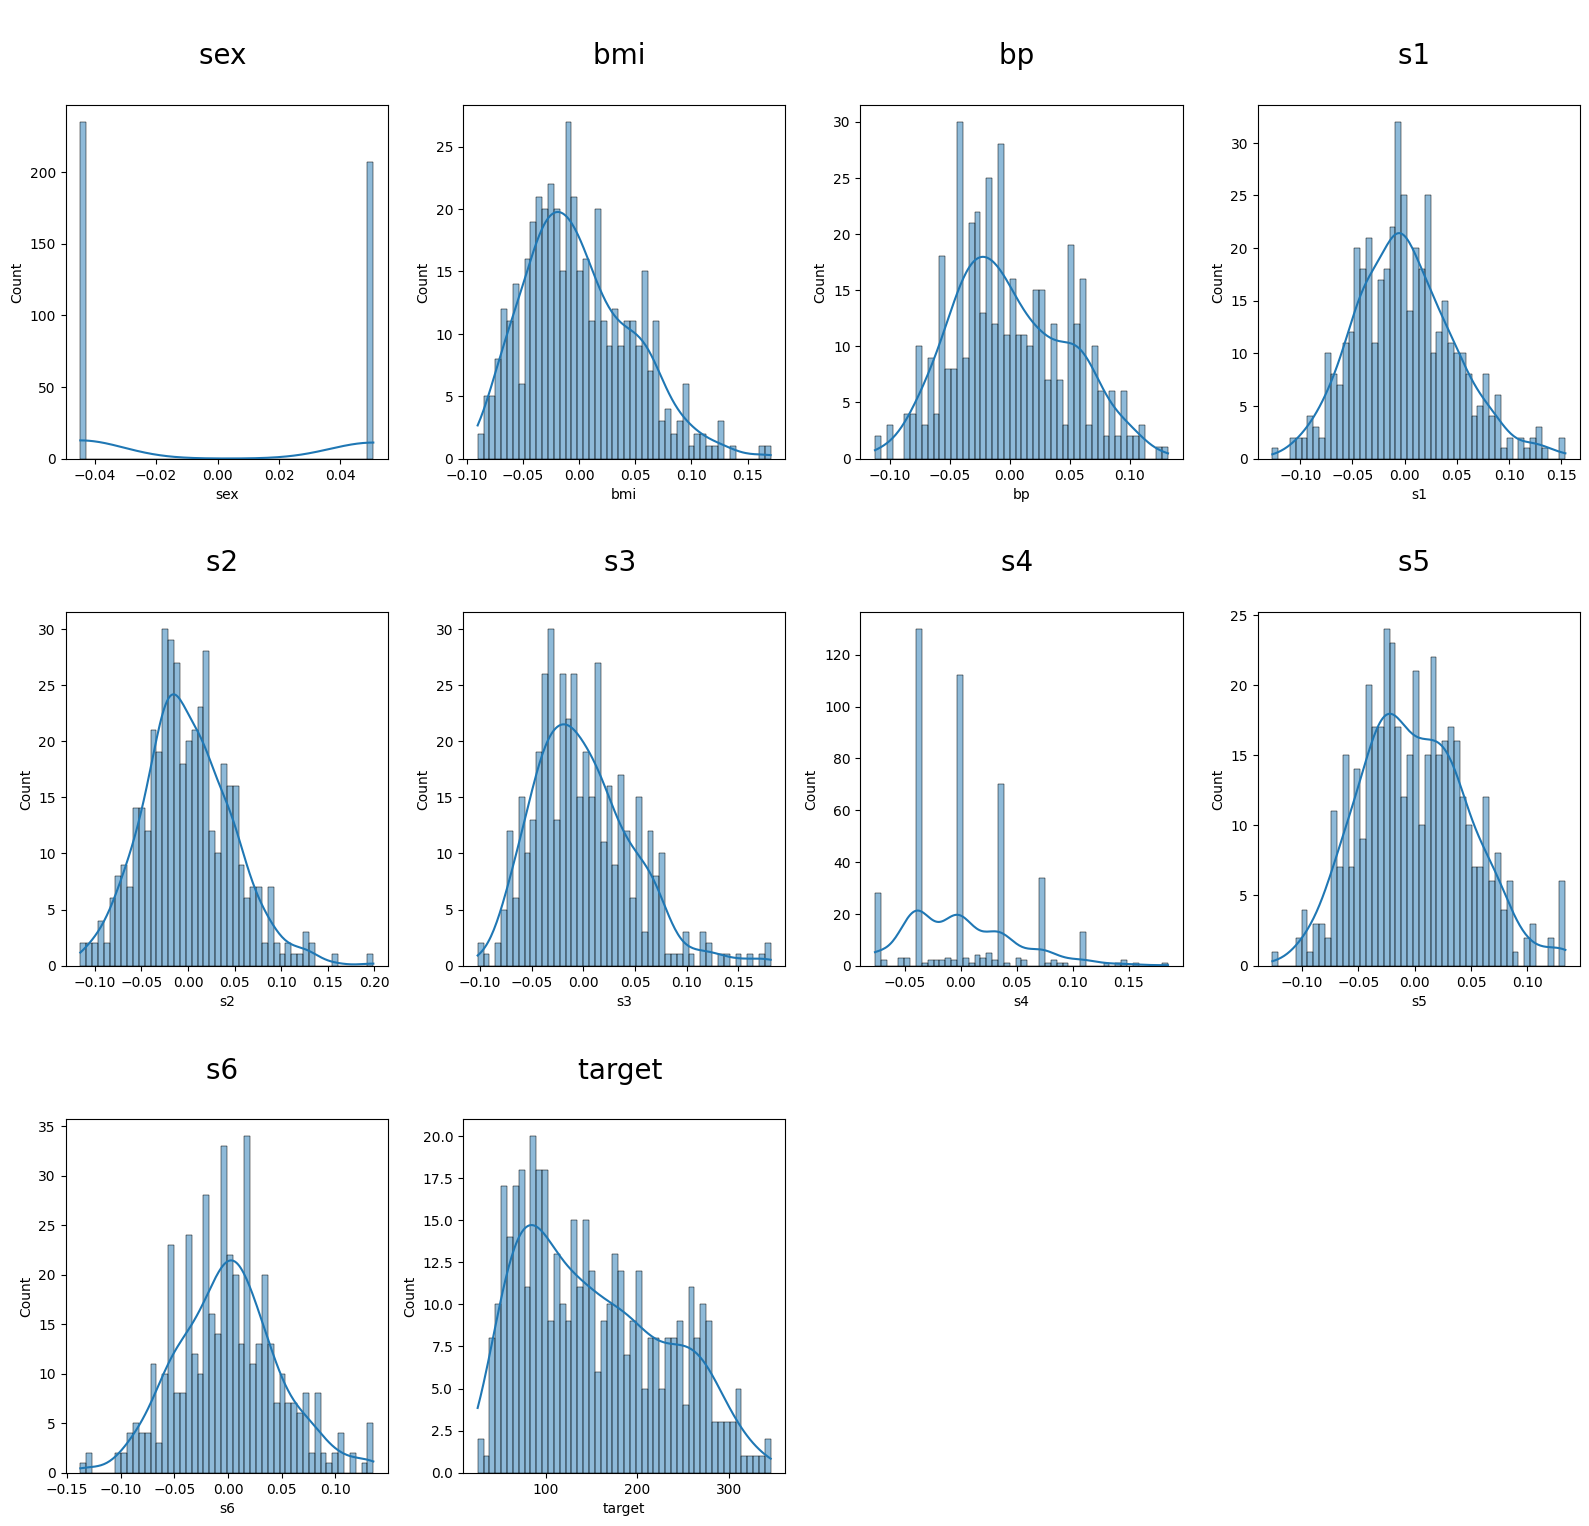

In [19]:
cols = diabetes.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(x = cols[i], data = diabetes, ax = ax, palette='rocket', kde = True, bins = 50)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)

    plotnumber += 1

plt.tight_layout()
plt.show()

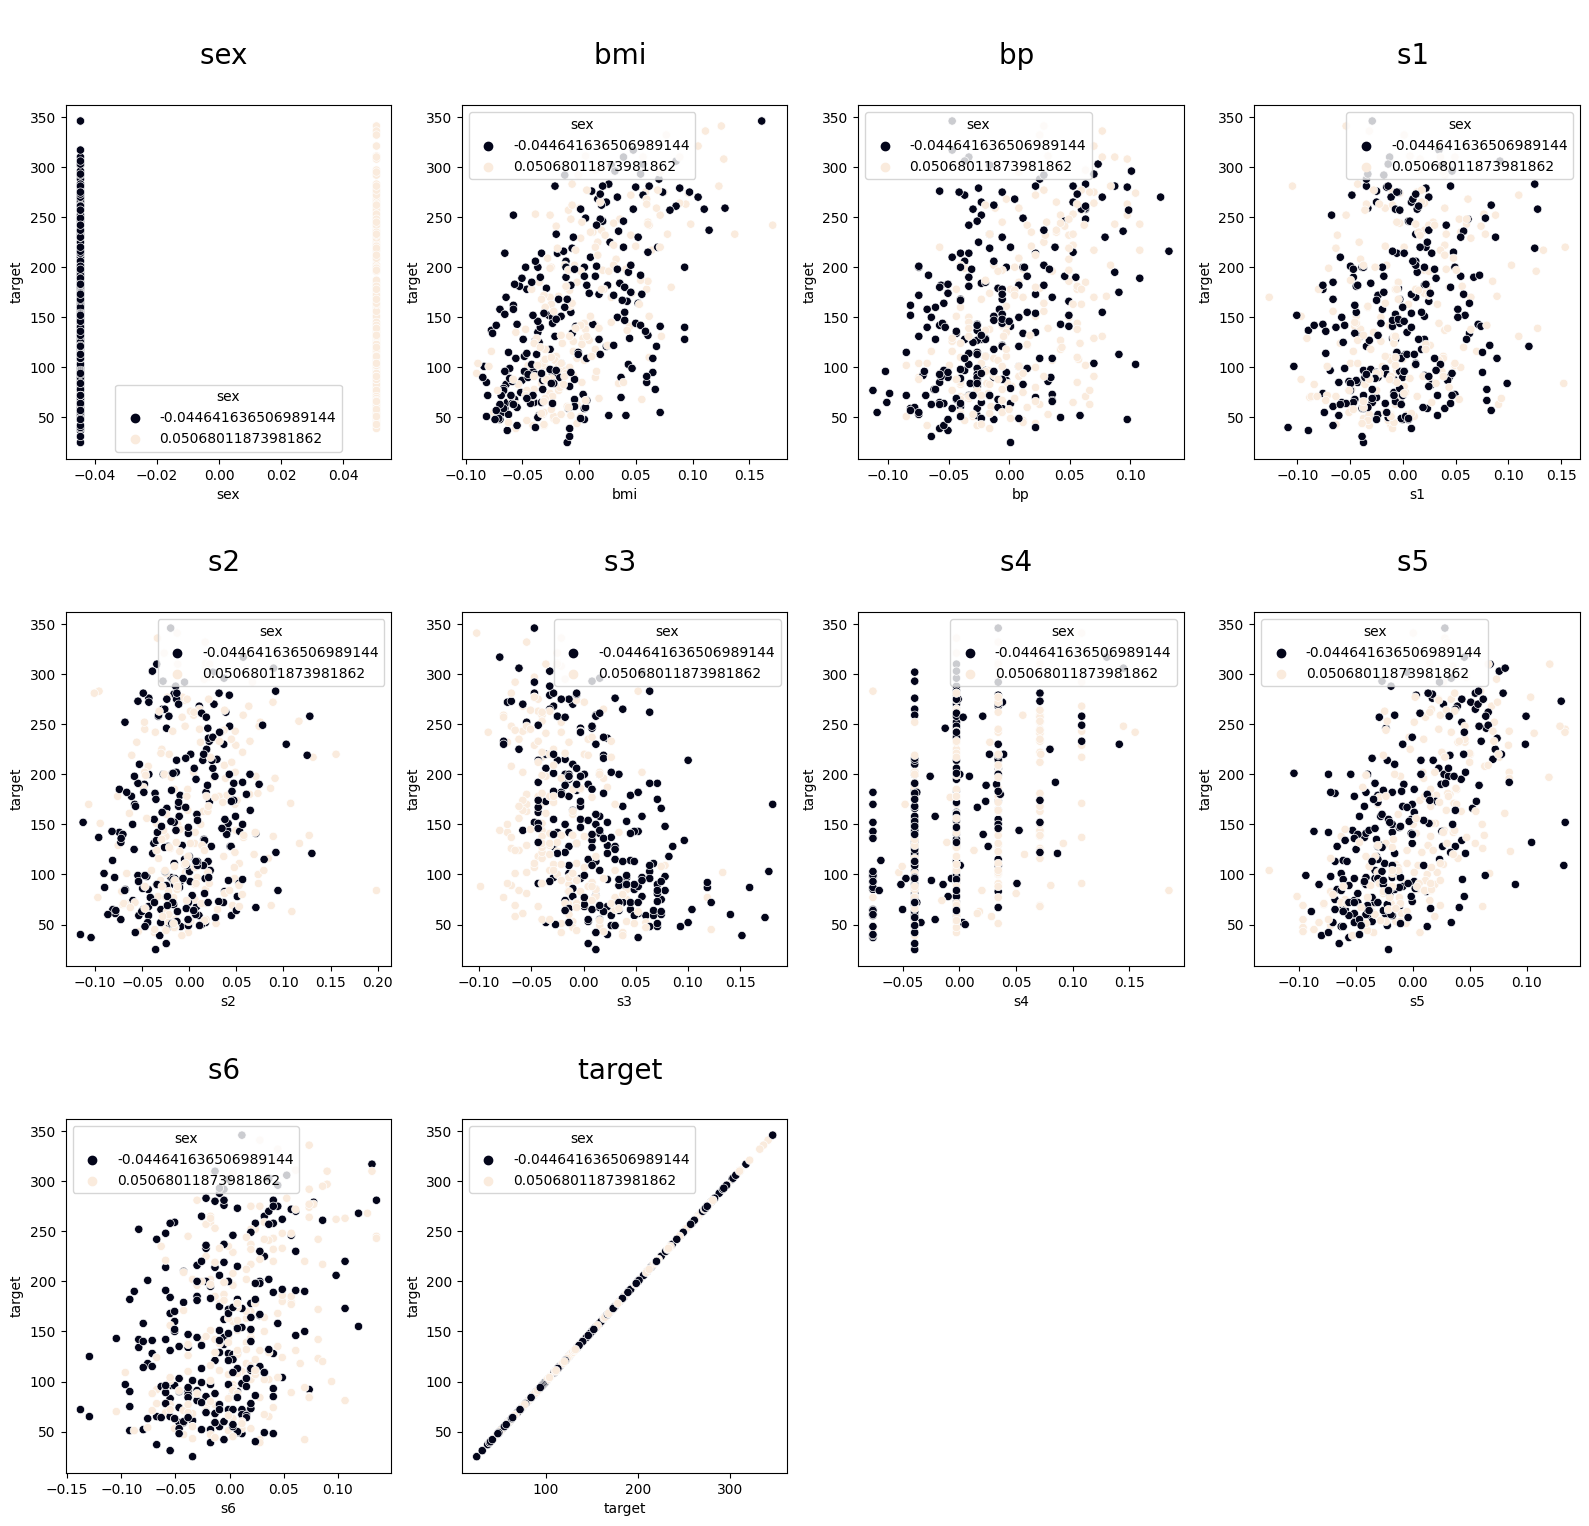

In [23]:
cols = diabetes.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(1, len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x = cols[i], y = diabetes['target'], data = diabetes, ax = ax, hue='sex', palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)

    plotnumber += 1

plt.tight_layout()
plt.show()

**Выводы**
1. Между таргетом и bmi наблюдается линейная зависимость.
2. Между таргетом и bp наблюдается линейная зависимость.
3. Между таргетом и s6 наблюдается линейная зависимость.
4. Между таргетом и s3 наблюдается гиперболическая зависимость.
5. Между таргетом и s5 наблюдается параболическая зависимость.

In [28]:
import xgboost as xg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [29]:
X, y = diabetes.iloc[:, :-1], diabetes.iloc[:, -1]

In [30]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)

In [31]:
# fitting and prediction via xgboost
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123).fit(train_X, train_y)
pred = xgb_r.predict(test_X)

[19:19:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

RMSE :  60.501688


In [33]:
# fitting and prediction via linear regression model
lr = LinearRegression().fit(train_X, train_y)
pred_lr = lr.predict(test_X)

In [34]:
# RMSE Computation for lr
rmse_lr = np.sqrt(MSE(test_y, pred_lr))
print("RMSE : % f" %(rmse_lr))

RMSE :  54.100089


# 2. Задание 2 [5 баллов]
Разбейте выборку на обучение и контроль. Вам может понадобится [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

*Разбиение произведено на предыдущем шаге*

# Задание 3. [10 баллов]

Проведите для данной выборки подбор гиперпараметров для модели `XGBoost` с помощью `Optuna`. Варьируйте **не менее 5** гиперпараметров.


In [36]:
!pip install optuna optuna-dashboard xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.4 MB/s eta 0:00:00


In [37]:
import optuna
import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection

In [71]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 3,40, log=True)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.15)
    subsample = trial.suggest_float('subsample', 0.1, 0.8)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 0.2)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.3, 0.7)
    max_depth = trial.suggest_int('max_depth', 2,9, log=True)
    xg_reg = xg.XGBRegressor(objective = 'reg:squarederror', n_estimators = n_estimators,
                           learning_rate = learning_rate, reg_lambda = reg_lambda,
                             max_depth = max_depth, subsample = subsample,
                             colsample_bytree = colsample_bytree, seed = 123)
    n_train_iter = 100

    for step in range(n_train_iter):
        xg_reg.fit(train_X, train_y)

        intermediate_value = np.sqrt(MSE(test_y, xg_reg.predict(test_X)))
        trial.report(intermediate_value, step)

        if trial.should_prune():
            raise optuna.TrialPruned()

    return np.sqrt(MSE(test_y, xg_reg.predict(test_X)))



In [72]:
study = optuna.create_study(
    direction="minimize",
    pruner=optuna.pruners.MedianPruner(
        n_startup_trials=5, n_warmup_steps=30, interval_steps=10
    ),
)
study.optimize(objective, n_trials=50)

[I 2023-07-24 20:15:19,520] A new study created in memory with name: no-name-57e8dfcd-a1f8-42a6-8368-18a2ffd1ff59
[I 2023-07-24 20:15:26,040] Trial 0 finished with value: 135.00614067113946 and parameters: {'n_estimators': 3, 'learning_rate': 0.08527185940130351, 'subsample': 0.3695154177072195, 'reg_lambda': 0.07049863726159802, 'colsample_bytree': 0.5016057595773454, 'max_depth': 6}. Best is trial 0 with value: 135.00614067113946.
[I 2023-07-24 20:15:28,904] Trial 1 finished with value: 124.16701655974859 and parameters: {'n_estimators': 22, 'learning_rate': 0.016324251013503176, 'subsample': 0.6934727207045428, 'reg_lambda': 0.1615194179900621, 'colsample_bytree': 0.6033343481431357, 'max_depth': 7}. Best is trial 1 with value: 124.16701655974859.
[I 2023-07-24 20:15:29,902] Trial 2 finished with value: 126.74112993517817 and parameters: {'n_estimators': 4, 'learning_rate': 0.08011833311105421, 'subsample': 0.36347251684114845, 'reg_lambda': 0.07908023774691393, 'colsample_bytree': 

In [73]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  50
Best trial:
  Value: 54.03583633525801
  Params: 
    n_estimators: 21
    learning_rate: 0.1476989343705604
    subsample: 0.6692087604408408
    reg_lambda: 0.187328908589401
    colsample_bytree: 0.4581769626244672
    max_depth: 3


# Задание 4. [5 баллов]

Проанализируйте результаты -- на сколько улучшилось качество модели с учетом Вашего разбиения.

В результате разбиения и подбора параметров с помощью алгоритмов Optuna, значение MSE снизилось с 0.6 до 0.54. Данное значение ошибки оказалось даже ниже аналогичного значения при создании модели линейной регрессии. Можно и далее продолжить уменьшение MSE, добавив вариативностей параметров модели. Безусловно, данный алгоритм позволяет оптимальным образом подбирать всевозможные гиперпараметры функций.